<a href="https://colab.research.google.com/github/Tejabhai2002/Salary_Estimation/blob/main/Salary_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Salary estimation using k- nearest neighbour algorithm

importing libraries

In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

choose dataset from local directory

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Estimation.csv to Salary_Estimation.csv


load dataset

In [4]:
dataset = pd.read_csv('Salary_Estimation.csv')
dataset

,age,education,capital gain,hours per week,income
0,90,9,0,40,<=50k
1,82,9,0,18,<=50k
2,66,10,0,40,<=50k
3,54,4,0,40,<=50k
4,41,10,0,40,<=50k
...,...,...,...,...,...
2694,82,9,0,18,<=50k
2695,66,10,0,40,<=50k
2696,54,4,0,40,<=50k
2697,41,10,0,40,<=50k


summarized dataset

In [5]:
print(dataset.shape)
print(dataset.head(5))

(2699, 5)
   age   education  capital gain  hours per week  income
0    90          9             0               40  <=50k
1    82          9             0               18  <=50k
2    66         10             0               40  <=50k
3    54          4             0               40  <=50k
4    41         10             0               40  <=50k


mapping salary data to binary value

In [6]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50k': 0, '>50k': 1}).astype(int)
print(dataset.head(5))

   age   education  capital gain  hours per week   income
0    90          9             0               40       0
1    82          9             0               18       0
2    66         10             0               40       0
3    54          4             0               40       0
4    41         10             0               40       0


segregate dataset into X(Input/independentVariable)&(outpu/DependentVariable)

In [7]:
X = dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [54,  4,  0, 40],
       [41, 10,  0, 40],
       [34,  9,  0, 45]])

In [8]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 0, 0, 0])

splitting data into training and testing data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.25, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.14328957,  0.73593111,  0.        ,  0.12553403],
       [ 0.73644173, -0.36578825,  0.        ,  0.12553403],
       [-1.25761588,  1.2867908 ,  0.        ,  1.49795502],
       ...,
       [-1.25761588,  1.2867908 ,  0.        ,  1.49795502],
       [-0.7297771 , -0.36578825,  0.        ,  1.95542869],
       [-0.49518209,  1.2867908 ,  0.        , -0.33193964]])

finding the best k-value

Text(0, 0.5, 'mean error')

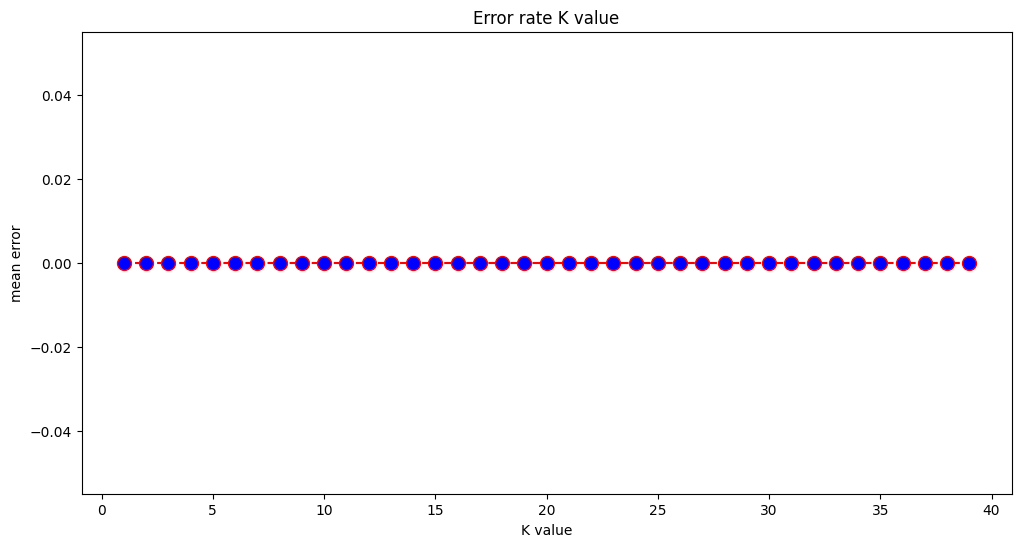

In [16]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,  y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error rate K value')
plt.xlabel('K value')
plt.ylabel('mean error')

training

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier()

Predicting wheather new customer with age & salary will buy or not

In [21]:
age = int(input("enter new employee's age: "))
edu = int(input("enter new employee's education: "))
cg = int(input("enter new employee's capital gain: "))
wh = int(input("enter new employee's hours per week: "))
newEmp = [[age, edu, cg, wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print(" Employee might got salary above 50k")
else:
    print(" Employee might not got salary above 50k")

enter new employee's age: 20
enter new employee's education: 16
enter new employee's capital gain: 0
enter new employee's hours per week: 50
[1]
 Employee might got salary above 50k


prediction for all test data

In [22]:
y_pred = model.predict(X_test)

evaluating model - confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix , accuracy_score
# cm = confusion matrix(y_test, y_pred)

# print("confusion matrix:")
# print(cm)

print("Accuracy of the model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the model: 100.0%
